# Activité 3 : bibliothèque Keras

<img src="https://cdn.pixabay.com/photo/2018/11/15/00/56/neural-network-3816319_1280.png" alt="reseau de neurones" width="400"/>

#### [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management

### Code pour indiquer l'importance des notions traitées dans cette activité

- #### 🥇 : connaissance fondamentale pour l'analyse de données
- #### 🥈 : connaissance importante pour l'analyse de données
- #### 🥉 : connaissance moins importante pour l'analyse de données
> Si rien n'est indiqué, il s'agit de connaissances fondamentales pour l'analyse de données

## 🔍 Recherche d'informations

En recherchant sur le web, trouver les réponses aux questions suivantes :

### - A quoi sert la bibliothèque Keras ?
___
Keras est une **bibliothèque haut niveau** permetant de **créer des réseaux de neurones**.

Source : https://fr.wikipedia.org/wiki/Keras
___
### - Qu'est-ce qu'une fonction d'activation ? 
___
Une **fonction d'activation** est une **fonction mathématique** qui apporte une **non linéarité** dans le réseau de neurones.

Source : https://fr.wikipedia.org/wiki/Fonction_d%27activation
___
### - Qu'est-ce qu'une fonction de perte ? 
___
La **fonction de perte (ou de coût)** est la fonction qui permet de calculer l'**erreur par rapport à la variable cible** et ainsi d'**optimiser les paramètres** du réseau de neurones.

Source : https://en.wikipedia.org/wiki/Loss_function
___
### - Qu'est-ce que la couche de neurones d'entrée ? Par quoi est-elle définie ?
___
Il s'agit de la **première couche** du réseau de neurones. Elle ne contient **pas de poids ou de biais**. Elle est définie par le **nombre de caractéristiques du jeu de données**.
___
### - Qu'est-ce qu'une couche de neurones cachée ? Par quoi est-elle définie ?
___
Il s'agit des couches à l'**intérieur du réseau de neurones**. Les hyperparamètres peuvent être modifiés pour optimiser le réseau. Elle est définie par l'**expérience** (papiers de recherche...).
___
### - Qu'est-ce que la couche de neurones de sortie ? Par quoi est-elle définie ?
___
Il s'agit de la **dernière couche** du réseau de neurones. Elle est définie par la **variable cible**.
___
### - Qu'est-ce qu'un optimiseur ? 
___
L'optimiseur est l'algorithme qui permet d'**optimiser les poids et les biais des neurones** en fonction du résultat de la fonction de perte.
___
### - Qu'est-ce qu'une époque ? 
___
Une époque correspond à un **entrainement du modèle** sur l'**ensemble du jeu de données d'entrainement**.
___
### - Qu'est-ce qu'un batch (lot) ? 
___
Le **batch** coreespond au **nombre de lignes du jeu de données** sur lequel le **gradient est caculé** avant d'effectuer la **rétropropagation du gradient**.
___

## ✏️ Activités

Pour cette partie sur les réseaux de neurones et la bibliothèque `keras`, nous allons reprendre les **données des contrôles sanitaires** des activités 1 et 2.

### 🥇Analyse exploratoire des données (EDA)

- Importer les **données des contrôles sanitaires** dans un **dataframe Pandas** à partir du fichier CSV créé dans l'activité 1

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

In [2]:
df = pd.read_csv("clean_data_sanitaire.csv")
df

,APP_Libelle_activite_etablissement,Synthese_eval_sanit,ods_type_activite,latitude,longitude,semaine,jour
0,Restaurant,Très satisfaisant,Autres,45.762926,4.832648,14,2
1,Alimentation générale,Très satisfaisant,Autres,45.487687,6.530501,12,3
2,Alimentation générale,Très satisfaisant,Autres,45.277210,6.344363,1,3
3,Restaurant,Satisfaisant,Autres,45.762510,4.832729,10,4
4,Boulangerie-Pâtisserie,Satisfaisant,Autres,45.182566,5.716843,3,4
...,...,...,...,...,...,...,...
32785,Entreposage de distribution de denrées aliment...,Très satisfaisant,Transport et entreposage de denrées alimentaires,42.482331,9.487211,18,4
32786,Restauration collective,Satisfaisant,Autres,42.627970,9.469757,33,3
32787,Boucherie-Charcuterie,Très satisfaisant,Autres,42.548024,9.525643,10,1
32788,Producteur fermier,Très satisfaisant,Autres,42.447770,9.172667,29,3


- **Détection de données aberrantes univariée** : calculer le nombre de **données aberrantes** dans la colonne "latitude" grâce au **z-score** (prendre un critère de z-score de 2.5 pour obtenir un résultat mais si la valeur de référence est plutôt 3). **Récupérér les lignes correspondantes**

In [3]:
abs_zscore = ((df["latitude"]-df["latitude"].mean())/df["latitude"].std()).abs()
print(f"Il y a {(abs_zscore>2.5).sum()} lignes avec un z-csore supérieur à 2.5 en valeur absolue")

Il y a 6 lignes avec un z-csore supérieur à 2.5 en valeur absolue


In [4]:
zscore_nidex = abs_zscore[(abs_zscore>2.5)].index
df.loc[zscore_nidex]

,APP_Libelle_activite_etablissement,Synthese_eval_sanit,ods_type_activite,latitude,longitude,semaine,jour
32409,Restauration collective,Satisfaisant,Autres,41.386513,9.183067,20,2
32425,Purification/Expédition de coquillages,Très satisfaisant,Produits de la mer et d'eau douce,41.386513,9.183067,11,5
32465,Mareyage et préparation de produits de la pêche,Très satisfaisant,Produits de la mer et d'eau douce,41.388241,9.166287,36,4
32608,Transformation de lait ou produits laitiers,Très satisfaisant,Lait et produits laitiers,41.407102,9.213451,18,4
32630,Producteur fermier,Très satisfaisant,Autres,41.374194,9.209217,18,5
32691,Transformation de lait ou produits laitiers,Très satisfaisant,Lait et produits laitiers,41.374465,9.217359,18,4


- **Détection de données aberrantes univariée** : même question avec la méthode de la **distance inter-quartile (comme avec les boîtes à moustaches)** (pour comme valeur de référence Q1 - 1 x IQR et Q3 + 1 x IQR pour obtenir un résultat mais si la valeur de référence est Q1 - 1.5 x IQR et Q3 + 1.5 x IQR)

In [5]:
q1 = df["latitude"].quantile(0.25)                 
q3 = df["latitude"].quantile(0.75)
iqr = q3 - q1
iqr_filter = (df["latitude"] < q1 - 1*iqr) | (df["latitude"] > q3 + 1*iqr)
print(f"Il y a {iqr_filter.sum()} lignes en dehors de la zone Q1 - 1 x IQR et Q3 + 1 x IQR")

Il y a 9 lignes en dehors de la zone Q1 - 1 x IQR et Q3 + 1 x IQR


In [6]:
df.loc[iqr_filter]

,APP_Libelle_activite_etablissement,Synthese_eval_sanit,ods_type_activite,latitude,longitude,semaine,jour
32278,Rayon boucherie-charcuterie,Très satisfaisant,Autres,41.491866,9.056060,11,3
32409,Restauration collective,Satisfaisant,Autres,41.386513,9.183067,20,2
32425,Purification/Expédition de coquillages,Très satisfaisant,Produits de la mer et d'eau douce,41.386513,9.183067,11,5
32465,Mareyage et préparation de produits de la pêche,Très satisfaisant,Produits de la mer et d'eau douce,41.388241,9.166287,36,4
32608,Transformation de lait ou produits laitiers,Très satisfaisant,Lait et produits laitiers,41.407102,9.213451,18,4
32621,Transformation de lait ou produits laitiers,Très satisfaisant,Lait et produits laitiers,41.491905,9.120438,18,4
32623,Purification/Expédition de coquillages,Très satisfaisant,Produits de la mer et d'eau douce,41.490732,9.057100,11,3
32630,Producteur fermier,Très satisfaisant,Autres,41.374194,9.209217,18,5
32691,Transformation de lait ou produits laitiers,Très satisfaisant,Lait et produits laitiers,41.374465,9.217359,18,4


- **Détection de données aberrantes multivariée** : **détecter les données aberrantes** des variables "latitude", "longitude", "semaine" et "jour" à l'aide de l'algorithme de clustering **DBSCAN**. Fixer la valeur de `min_samples` à 2 et faire varier `eps` pour obtenir un nombre de données aberrantes (cluster -1) inférieur à 20 et supérieur à 0. **Afficher ces données sur une carte**.

Ressource : [sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
clustering = DBSCAN(eps=1.5, min_samples=2).fit(df[["latitude", "longitude", "semaine", "jour"]])
clustering.labels_

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

In [9]:
df["dbscan_labels"] = clustering.labels_
df

,APP_Libelle_activite_etablissement,Synthese_eval_sanit,ods_type_activite,latitude,longitude,semaine,jour,dbscan_labels
0,Restaurant,Très satisfaisant,Autres,45.762926,4.832648,14,2,0
1,Alimentation générale,Très satisfaisant,Autres,45.487687,6.530501,12,3,0
2,Alimentation générale,Très satisfaisant,Autres,45.277210,6.344363,1,3,0
3,Restaurant,Satisfaisant,Autres,45.762510,4.832729,10,4,0
4,Boulangerie-Pâtisserie,Satisfaisant,Autres,45.182566,5.716843,3,4,0
...,...,...,...,...,...,...,...,...
32785,Entreposage de distribution de denrées aliment...,Très satisfaisant,Transport et entreposage de denrées alimentaires,42.482331,9.487211,18,4,7
32786,Restauration collective,Satisfaisant,Autres,42.627970,9.469757,33,3,7
32787,Boucherie-Charcuterie,Très satisfaisant,Autres,42.548024,9.525643,10,1,7
32788,Producteur fermier,Très satisfaisant,Autres,42.447770,9.172667,29,3,7


In [10]:
df["dbscan_labels"].value_counts()

 0    32192
 7      562
-1       16
 3        8
 1        4
 2        2
 4        2
 5        2
 6        2
Name: dbscan_labels, dtype: int64

In [11]:
df[df["dbscan_labels"]==-1]

,APP_Libelle_activite_etablissement,Synthese_eval_sanit,ods_type_activite,latitude,longitude,semaine,jour,dbscan_labels
14390,Purification/Expédition de coquillages,Très satisfaisant,Produits de la mer et d'eau douce,48.573341,-2.818175,52,5,-1
15636,Restaurant,Satisfaisant,Autres,49.411314,3.048361,22,7,-1
17768,Restaurant,Très satisfaisant,Autres,43.316526,3.548468,36,7,-1
17871,Chaîne d'abattage de volaille/lagomorphe/petit...,Satisfaisant,Abattoirs,43.337036,1.785719,24,7,-1
19498,Restaurant,Satisfaisant,Autres,42.873227,-0.002630,30,7,-1
22343,Traiteur,Très satisfaisant,Autres,47.459565,6.827642,36,7,-1
22444,Restaurant,Très satisfaisant,Autres,46.673470,5.546374,52,4,-1
23484,Traiteur,Satisfaisant,Autres,48.169868,4.218425,33,7,-1
23580,Traiteur|Boucherie-Charcuterie,Satisfaisant,Autres,48.607950,7.751750,50,5,-1
25188,Restauration collective,Très satisfaisant,Autres,49.940648,4.634809,50,4,-1


In [12]:
import folium

In [13]:
m = folium.Map(location=[46.227638, 2.213749], zoom_start=6)
df[df["dbscan_labels"]==-1].apply(
    lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], radius=2, popup=row["Synthese_eval_sanit"]).add_to(m),
    axis=1,
)
m

In [14]:
df = df.drop("dbscan_labels", axis=1)

### 🥇 Pré-traitement des données

- **Séparer la variable cible** (nommé `y`) des autres variables. Appliquer un **`LabelEncoder()`** sur la variable cible. Créer une **variable `X`** avec les **variables quantitatives** "latitude", "longitude", "semaine" et "jour" sous forme de **tableau Numpy**.

Ressource : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [16]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(df["Synthese_eval_sanit"])
y

array([3, 3, 3, ..., 3, 3, 2])

In [17]:
X = df[["latitude", "longitude", "semaine", "jour"]].to_numpy()
X

array([[45.762926,  4.832648, 14.      ,  2.      ],
       [45.487687,  6.530501, 12.      ,  3.      ],
       [45.27721 ,  6.344363,  1.      ,  3.      ],
       ...,
       [42.548024,  9.525643, 10.      ,  1.      ],
       [42.44777 ,  9.172667, 29.      ,  3.      ],
       [41.928462,  8.738011,  9.      ,  4.      ]])

- Séparer les données en un **jeu d'entrainement** et un **jeu de test**

Ressource : [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- **Standardiser les données** car les données doivent être **standardisées** pour être utilisées par un **réseau de neurones**

Ressource : [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 🥈Réseaux de neurones pour la classification

- Compléter le code suivant pour créer un **réseau de neurones** séquentiel. Ajouter 4 couches de neurones : **couche cachée** (avec autant de neurones que de caractéristiques), une **couche cachée à 12 neurones** avec une **fonction d'activation "tanh"**, une **couche cachée à 24 neurones** avec une **fonction d'activation "tanh"** et la **couche de sortie** avec autant de neurones que de classes et une **fonction d'activation "softmax"**. Compiler le modèle avec une fonction de perte (loss) de type `tf.keras.losses.SparseCategoricalCrossentropy()`, un optimiseur de type `adam` et une métrique de type `accuracy`.

Ressources :

- [The Sequential class - keras](https://keras.io/api/models/sequential/)

In [20]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(12, input_shape=(4,), activation="tanh"))
    model.add(tf.keras.layers.Dense(24, activation="tanh"))
    model.add(tf.keras.layers.Dense(4, activation="softmax"))
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    return model

- **Visualiser la structure** du réseau de neurones.

Ressource :

- https://keras.io/api/models/model/#summary-method

In [21]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 4)                 100       
                                                                 
Total params: 472
Trainable params: 472
Non-trainable params: 0
_________________________________________________________________


- **Transformer le réseau de neurone Keras** en modèle **scikit-learn** grâce à `KerasClassifier` de la bibliothèque `scikeras` avec un `batch_size` de 10 et un nombre d'époques (`epochs`) de 10. **Entrainer le modèle** avec les **données d'entrainement**.

In [24]:
model = KerasClassifier(model=create_model, batch_size=10, epochs=10)
model.fit(X_train, y_train)

Epoch 1/10
2197/2197 [==============================] - 8s 3ms/step - loss: 0.8976 - accuracy: 0.5271
Epoch 2/10
2197/2197 [==============================] - 6s 3ms/step - loss: 0.8638 - accuracy: 0.5423
Epoch 3/10
2197/2197 [==============================] - 6s 3ms/step - loss: 0.8606 - accuracy: 0.5432
Epoch 4/10
2197/2197 [==============================] - 6s 3ms/step - loss: 0.8578 - accuracy: 0.5541
Epoch 5/10
2197/2197 [==============================] - 6s 3ms/step - loss: 0.8567 - accuracy: 0.5532
Epoch 6/10
2197/2197 [==============================] - 6s 3ms/step - loss: 0.8562 - accuracy: 0.5549
Epoch 7/10
2197/2197 [==============================] - 7s 3ms/step - loss: 0.8553 - accuracy: 0.5552
Epoch 8/10
2197/2197 [==============================] - 8s 4ms/step - loss: 0.8546 - accuracy: 0.5571
Epoch 9/10
2197/2197 [==============================] - 6s 3ms/step - loss: 0.8543 - accuracy: 0.5550
Epoch 10/10
2197/2197 [==============================] - 7s 3ms/step - loss: 0.854

KerasClassifier(
	model=<function create_model at 0x00000261615EFA60>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

- **Récupérer la fonction `show_metrics()`** de l'activité 1 et appliquer cette fonction au modèle. **Analyser les résultats**

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score
import matplotlib.pyplot as plt

In [26]:
def show_metrics(model):
    print(classification_report(y_test, model.predict(X_test)))
    print(f"F beta avec beta=2 (plus d'importance pour le rappel) : {fbeta_score(y_test, model.predict(X_test), beta=2, average=None)}")
    ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
    plt.xticks(rotation=90)
    plt.show()

1083/1083 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       551
           1       0.00      0.00      0.00        37
           2       0.58      0.76      0.66      5839
           3       0.52      0.38      0.44      4394

    accuracy                           0.56     10821
   macro avg       0.27      0.28      0.27     10821
weighted avg       0.52      0.56      0.53     10821

   1/1083 [..............................] - ETA: 2:09

D:\A_graver\Webforce3\Formation-DA-GEM-2022\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\A_graver\Webforce3\Formation-DA-GEM-2022\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\A_graver\Webforce3\Formation-DA-GEM-2022\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

1083/1083 [==============================] - 4s 3ms/step
F beta avec beta=2 (plus d'importance pour le rappel) : [0.         0.         0.71216282 0.39931724]
1083/1083 [==============================] - 2s 2ms/step


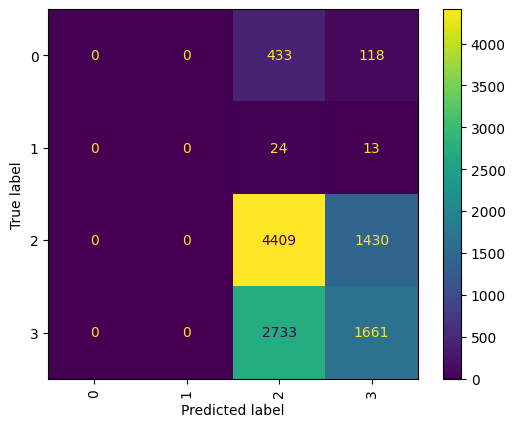

In [27]:
show_metrics(model)

- Essayer d'**améliorer la qualité du modèle** de réseau de neurones en modifiant les **hyperparamètres du réseau**

In [28]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(24, input_shape=(4,), activation="relu"))
    model.add(tf.keras.layers.Dense(48, activation="relu"))
    model.add(tf.keras.layers.Dense(96, activation="relu"))
    model.add(tf.keras.layers.Dense(192, activation="relu"))
    model.add(tf.keras.layers.Dense(4, activation="softmax"))
    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer="adam", metrics=['accuracy'])
    return model

In [29]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                120       
                                                                 
 dense_7 (Dense)             (None, 48)                1200      
                                                                 
 dense_8 (Dense)             (None, 96)                4704      
                                                                 
 dense_9 (Dense)             (None, 192)               18624     
                                                                 
 dense_10 (Dense)            (None, 4)                 772       
                                                                 
Total params: 25,420
Trainable params: 25,420
Non-trainable params: 0
_________________________________________________________________


In [30]:
model = KerasClassifier(model=create_model, batch_size=20, epochs=500)
model.fit(X_train, y_train)

Epoch 1/500
1099/1099 [==============================] - 6s 4ms/step - loss: 0.8748 - accuracy: 0.5411
Epoch 2/500
1099/1099 [==============================] - 4s 3ms/step - loss: 0.8573 - accuracy: 0.5555
Epoch 3/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.8544 - accuracy: 0.5598
Epoch 4/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.8517 - accuracy: 0.5618
Epoch 5/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.8503 - accuracy: 0.5629
Epoch 6/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.8480 - accuracy: 0.5660
Epoch 7/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.8471 - accuracy: 0.5677
Epoch 8/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.8455 - accuracy: 0.5688
Epoch 9/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.8439 - accuracy: 0.5714
Epoch 10/500
1099/1099 [==============================] - 3s 3ms/step - l

1099/1099 [==============================] - 3s 3ms/step - loss: 0.7406 - accuracy: 0.6399
Epoch 80/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.7391 - accuracy: 0.6393
Epoch 81/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.7410 - accuracy: 0.6418
Epoch 82/500
1099/1099 [==============================] - 5s 4ms/step - loss: 0.7360 - accuracy: 0.6438
Epoch 83/500
1099/1099 [==============================] - 4s 4ms/step - loss: 0.7362 - accuracy: 0.6409
Epoch 84/500
1099/1099 [==============================] - 4s 3ms/step - loss: 0.7335 - accuracy: 0.6430
Epoch 85/500
1099/1099 [==============================] - 4s 3ms/step - loss: 0.7317 - accuracy: 0.6468
Epoch 86/500
1099/1099 [==============================] - 4s 4ms/step - loss: 0.7303 - accuracy: 0.6449
Epoch 87/500
1099/1099 [==============================] - 4s 3ms/step - loss: 0.7294 - accuracy: 0.6462
Epoch 88/500
1099/1099 [==============================] - 4s 3ms/step - loss:

1099/1099 [==============================] - 3s 3ms/step - loss: 0.6482 - accuracy: 0.6885
Epoch 158/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.6439 - accuracy: 0.6874
Epoch 159/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.6435 - accuracy: 0.6937
Epoch 160/500
1099/1099 [==============================] - 3s 2ms/step - loss: 0.6422 - accuracy: 0.6907
Epoch 161/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.6416 - accuracy: 0.6938
Epoch 162/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.6418 - accuracy: 0.6933
Epoch 163/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.6373 - accuracy: 0.6919
Epoch 164/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.6412 - accuracy: 0.6933
Epoch 165/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.6361 - accuracy: 0.6931
Epoch 166/500
1099/1099 [==============================] - 2s 2ms/ste

1099/1099 [==============================] - 2s 2ms/step - loss: 0.5827 - accuracy: 0.7238
Epoch 236/500
1099/1099 [==============================] - 3s 2ms/step - loss: 0.5789 - accuracy: 0.7245
Epoch 237/500
1099/1099 [==============================] - 3s 2ms/step - loss: 0.5807 - accuracy: 0.7261
Epoch 238/500
1099/1099 [==============================] - 3s 3ms/step - loss: 0.5773 - accuracy: 0.7232
Epoch 239/500
1099/1099 [==============================] - 3s 2ms/step - loss: 0.5794 - accuracy: 0.7241
Epoch 240/500
1099/1099 [==============================] - 3s 2ms/step - loss: 0.5791 - accuracy: 0.7257
Epoch 241/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.5753 - accuracy: 0.7249
Epoch 242/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.5777 - accuracy: 0.7275
Epoch 243/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.5742 - accuracy: 0.7294
Epoch 244/500
1099/1099 [==============================] - 2s 2ms/ste

1099/1099 [==============================] - 2s 1ms/step - loss: 0.5372 - accuracy: 0.7446
Epoch 314/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5396 - accuracy: 0.7437
Epoch 315/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5412 - accuracy: 0.7413
Epoch 316/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5351 - accuracy: 0.7454
Epoch 317/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5377 - accuracy: 0.7475
Epoch 318/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5355 - accuracy: 0.7465
Epoch 319/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5366 - accuracy: 0.7475
Epoch 320/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5356 - accuracy: 0.7493
Epoch 321/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5346 - accuracy: 0.7489
Epoch 322/500
1099/1099 [==============================] - 2s 1ms/ste

1099/1099 [==============================] - 2s 1ms/step - loss: 0.5146 - accuracy: 0.7594
Epoch 392/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5102 - accuracy: 0.7640
Epoch 393/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5086 - accuracy: 0.7648
Epoch 394/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5067 - accuracy: 0.7642
Epoch 395/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5093 - accuracy: 0.7645
Epoch 396/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5147 - accuracy: 0.7611
Epoch 397/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5026 - accuracy: 0.7668
Epoch 398/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5053 - accuracy: 0.7628
Epoch 399/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.5111 - accuracy: 0.7602
Epoch 400/500
1099/1099 [==============================] - 2s 2ms/ste

1099/1099 [==============================] - 2s 1ms/step - loss: 0.4908 - accuracy: 0.7701
Epoch 470/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.4875 - accuracy: 0.7731
Epoch 471/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.4902 - accuracy: 0.7728
Epoch 472/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.4918 - accuracy: 0.7716
Epoch 473/500
1099/1099 [==============================] - 2s 2ms/step - loss: 0.4842 - accuracy: 0.7738
Epoch 474/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.4925 - accuracy: 0.7732
Epoch 475/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.4913 - accuracy: 0.7725
Epoch 476/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.4891 - accuracy: 0.7729
Epoch 477/500
1099/1099 [==============================] - 2s 1ms/step - loss: 0.4884 - accuracy: 0.7752
Epoch 478/500
1099/1099 [==============================] - 2s 1ms/ste

KerasClassifier(
	model=<function create_model at 0x0000026167D6E280>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=20
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=500
	class_weight=None
)

542/542 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.19      0.14      0.16       551
           1       0.05      0.05      0.05        37
           2       0.62      0.67      0.64      5839
           3       0.53      0.49      0.51      4394

    accuracy                           0.57     10821
   macro avg       0.35      0.34      0.34     10821
weighted avg       0.56      0.57      0.56     10821

542/542 [==============================] - 1s 1ms/step
F beta avec beta=2 (plus d'importance pour le rappel) : [0.14417532 0.05235602 0.65685317 0.49986128]
542/542 [==============================] - 1s 1ms/step


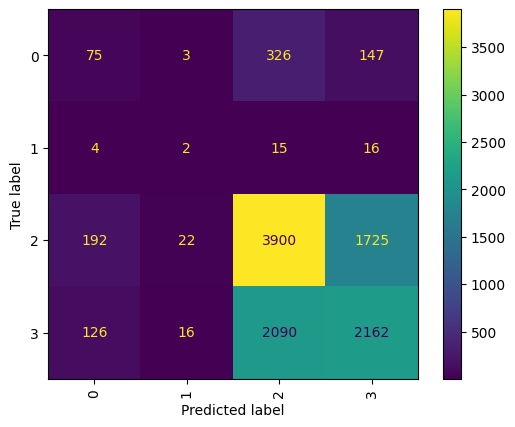

In [31]:
show_metrics(model)

## 🚀 Pour aller plus loin

- [Documentation de Keras](https://keras.io/getting_started/)
- [Use Keras Deep Learning Models with Scikit-Learn in Python](https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/)

___
*👨‍🏫 [Pierre-Loic BAYART](https://www.linkedin.com/in/pierreloicbayart/) - Formation développeur d'applications spécialisation data analyst - Webforce3 - Grenoble Ecole de Management*
___
Source images d'illustration : Image par Gordon Johnson de Pixabay